In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [201]:
df = pd.read_fwf("auto-mpg.data",names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [234]:
df_new=df[df['horsepower']!='?']
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [235]:
df_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


1. Analyze the data to get relevant insight

In [236]:
df_new['origin'].unique()

array([1, 3, 2])

In [237]:
df_new['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [238]:
df_new['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [239]:
# df['horsepower'].isnull().sum()
df_new.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [241]:
df_corr = df_new.corr()
df_corr

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000


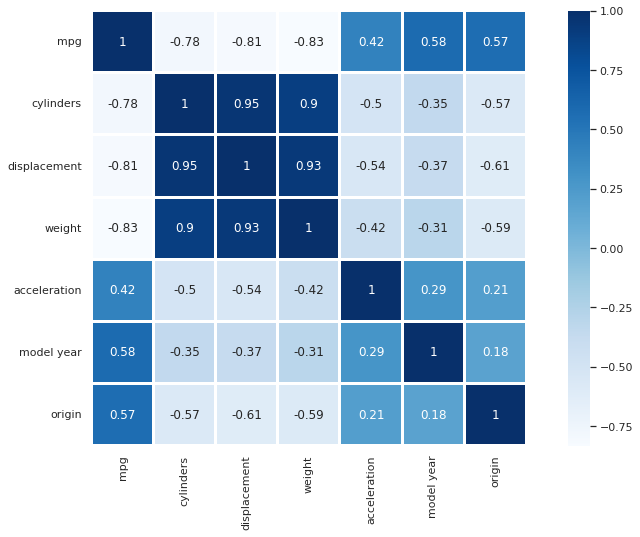

In [242]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_corr,annot=True,linewidths=2,square=True, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


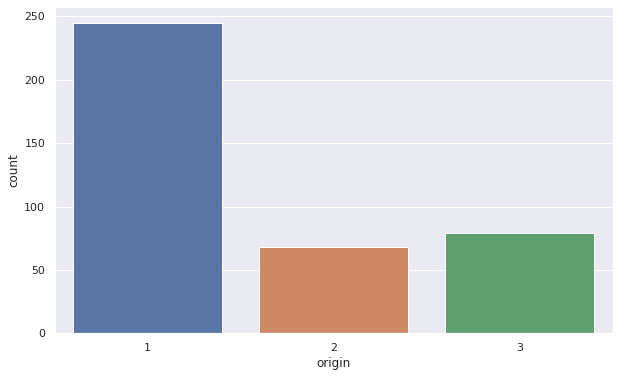

In [243]:
plt.figure(figsize=(10,6))
sns.countplot(df_new['origin'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


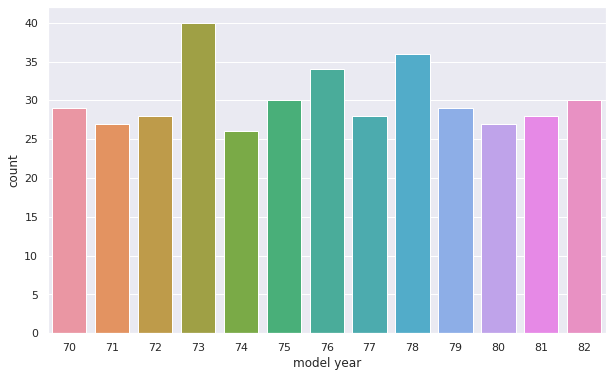

In [244]:
plt.figure(figsize=(10,6))
sns.countplot(df_new['model year'])

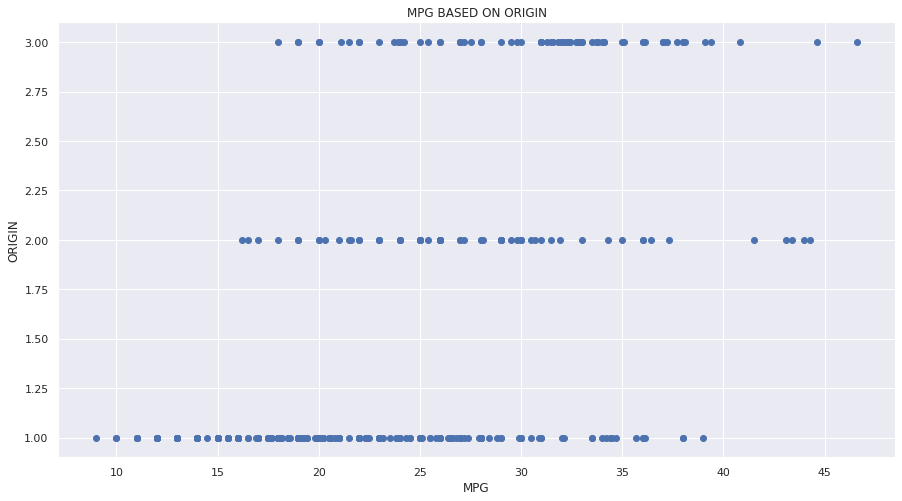

In [245]:
plt.xlabel('MPG')
plt.ylabel('ORIGIN')
plt.title('MPG BASED ON ORIGIN')
plt.scatter(df_new['mpg'],df_new['origin'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


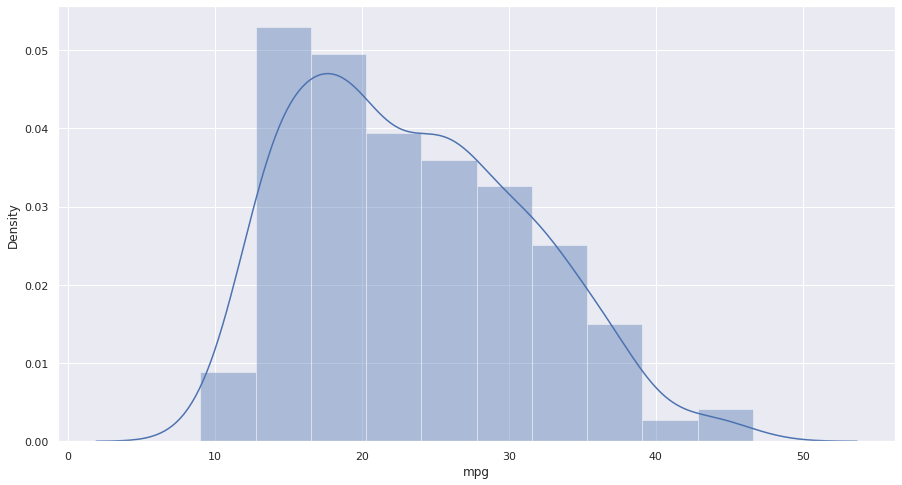

In [246]:
sns.distplot(df_new['mpg'],bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


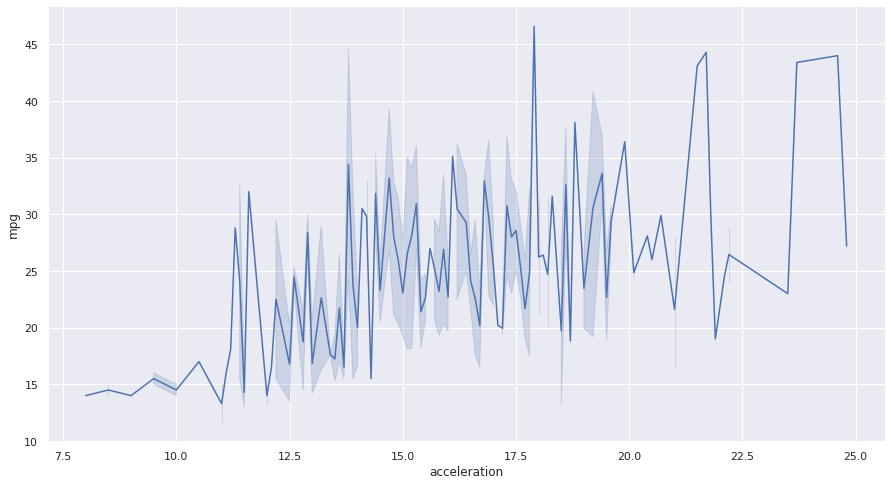

In [247]:
sns.lineplot(df_new['acceleration'], df_new['mpg'])
plt.show()

2. Get feature matrix X, and target variable y.

In [151]:
# X = df[['acceleration','model year','origin']]
# X

In [271]:
pd.to_numeric(df_new['horsepower'])
X = df_new[['acceleration','cylinders','displacement','horsepower','weight']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   acceleration  392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 26.5+ KB


In [272]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(np.array(X['acceleration']).reshape(-1,1))
minmax_df = pd.DataFrame(minmax_df)
X['acceleration']=minmax_df
minmax_df = scaler.fit_transform(np.array(X['displacement']).reshape(-1,1))
minmax_df = pd.DataFrame(minmax_df)
X['displacement']=minmax_df
minmax_df = scaler.fit_transform(np.array(X['horsepower']).reshape(-1,1))
minmax_df = pd.DataFrame(minmax_df)
lm = LabelEncoder()
X['horsepower']=lm.fit_transform(X['horsepower'])
X
# scaler.fit(X)
# X_minmax = scaler.transform(X)
# X_minmax

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,acceleration,cylinders,displacement,horsepower,weight
0,0.238095,8,0.617571,15,3504.0
1,0.208333,8,0.728682,33,3693.0
2,0.178571,8,0.645995,27,3436.0
3,0.238095,8,0.609819,27,3433.0
4,0.148810,8,0.604651,22,3449.0
...,...,...,...,...,...
393,NaN,4,NaN,80,2790.0
394,NaN,4,NaN,51,2130.0
395,NaN,4,NaN,78,2295.0
396,NaN,4,NaN,73,2625.0


In [273]:
X.drop(X.tail(6).index,inplace = True)
X.tail(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,acceleration,cylinders,displacement,horsepower,weight
382,0.386905,4,0.227390,65,2245.0
383,0.398810,4,0.423773,62,1965.0
384,0.351190,4,0.196382,62,1965.0
385,0.297619,4,0.173127,62,1995.0
386,0.553571,6,0.214470,6,2945.0
387,0.452381,6,0.186047,79,3015.0
388,0.988095,4,0.074935,86,2585.0
389,0.214286,6,0.173127,7,2835.0
390,0.630952,4,0.134367,90,2665.0
391,0.678571,4,0.131783,78,2370.0


In [274]:
Y=df_new['mpg']
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [275]:
Y.drop(Y.tail(6).index,inplace = True)
Y.tail(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


382    34.0
383    38.0
384    32.0
385    38.0
386    25.0
387    38.0
388    26.0
389    22.0
390    32.0
391    36.0
Name: mpg, dtype: float64

4. Normalize data using MinMaxScaler.

In [221]:
# scaler = MinMaxScaler()
# lm=LabelEncoder()
# minmax_df = scaler.fit_transform(np.array(X['acceleration']).reshape(-1,1))
# minmax_df = pd.DataFrame(minmax_df)
# X['acceleration']=minmax_df
# X['model year']=lm.fit_transform(X['model year'])
# X['origin']=lm.fit_transform(X['origin'])
# X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,acceleration,model year,origin
0,0.238095,0,0
1,0.208333,0,0
2,0.178571,0,0
3,0.238095,0,0
4,0.148810,0,0
...,...,...,...
393,0.452381,12,0
394,0.988095,12,1
395,0.214286,12,0
396,0.630952,12,0


In [262]:
scaler = MinMaxScaler()


In [263]:
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(np.array(Y).reshape(-1,1))
minmax_df = pd.DataFrame(minmax_df)
Y=minmax_df
Y


,0
0,0.239362
1,0.159574
2,0.239362
3,0.186170
4,0.212766
...,...
387,0.771277
388,0.452128
389,0.345745
390,0.611702


3. Split data into training and testing.

In [276]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 111)

5. Create a LinearRegression object for modeling.

In [277]:
from sklearn.linear_model import LinearRegression

# creating a object
linear_reg = LinearRegression()

6. Train the model with training data.

In [278]:
linear_reg.fit(xtrain, ytrain)

LinearRegression()

In [279]:
pred = linear_reg.predict(xtest)
r2 = metrics.r2_score(ytest,pred)
r2

0.7530762339161873

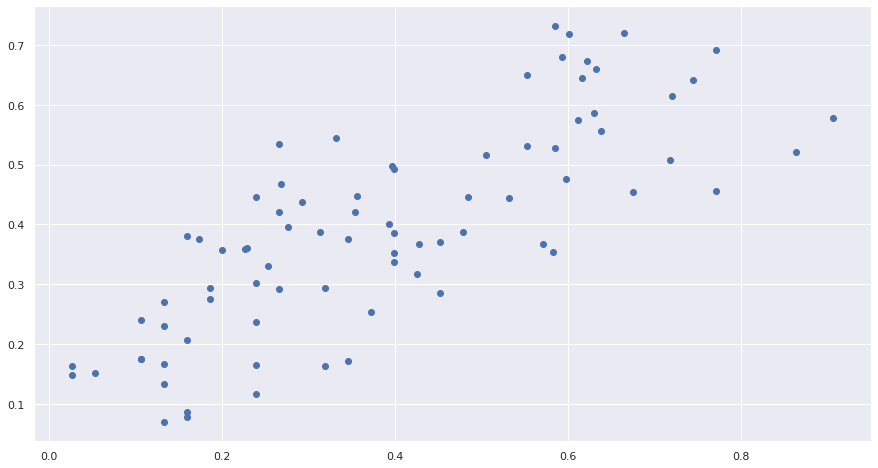

In [218]:
plt.scatter(ytest,pred)
plt.show()